<a href="https://www.kaggle.com/code/lrntszab/guinea-pig-detector-yolov8?scriptVersionId=167680782" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/guinea-pig-detection/README.dataset.txt
/kaggle/input/guinea-pig-detection/README.roboflow.txt
/kaggle/input/guinea-pig-detection/data.yaml
/kaggle/input/guinea-pig-detection/valid/labels/20190831_135932_jpg.rf.586ee950a0ea395e509b2d45482b9baf.txt
/kaggle/input/guinea-pig-detection/valid/labels/20230529_163438_jpg.rf.fb642e3a411eb6d79b9da1d55b92e18c.txt
/kaggle/input/guinea-pig-detection/valid/labels/20210727_022005_jpg.rf.4aa30e664e8299e0626a2ded9ff7ccdd.txt
/kaggle/input/guinea-pig-detection/valid/labels/received_481889782288465_jpeg.rf.a5f749947756dcaa688c3e3f65854d72.txt
/kaggle/input/guinea-pig-detection/valid/labels/20221119_212042_jpg.rf.92a3b888a2b624684010328f437d14f2.txt
/kaggle/input/guinea-pig-detection/valid/labels/105-2020-2_jpg.rf.0a54dc5fa88a6c8775f6a2182b5d92bf.txt
/kaggle/input/guinea-pig-detection/valid/labels/20190705_113559_jpg.rf.6fc7b55db1c80de63965ce6111b3c97f.txt
/kaggle/input/guinea-pig-detection/valid/labels/20220831_133544_jpg.rf.963147891ff630

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 699.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 5.6 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)

OS                  Linux-5.15.133+-x86_64-with-glibc2.31
Environment         Kaggle
Python              3.10.13
Install             pip
RAM                 31.36 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.5>=3.3.0
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 9.5.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.12.0>=1.4.1
torch               ✅ 2.1.2>=1.8.0
torchvision         ✅ 0.16.2>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.7
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.2.0>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0


In [4]:
!wandb disabled

W&B disabled.


In [5]:
!yolo detect train model=yolov8m.pt data=/kaggle/input/guinea-pig-detection/data.yaml epochs=30 imgsz=640 device=0,1 batch=-1

100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 211MB/s]
Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
                                                      CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/guinea-pig-detection/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_

In [6]:
!yolo detect val model=runs/detect/train/weights/best.pt data=/kaggle/input/guinea-pig-detection/data.yaml

Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /kaggle/input/guinea-pig-detection/valid/labels... 118 images, 0 b
val: WARNING ⚠️ Cache directory /kaggle/input/guinea-pig-detection/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        118        205      0.938      0.881      0.957       0.75
Speed: 2.2ms preprocess, 21.3ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

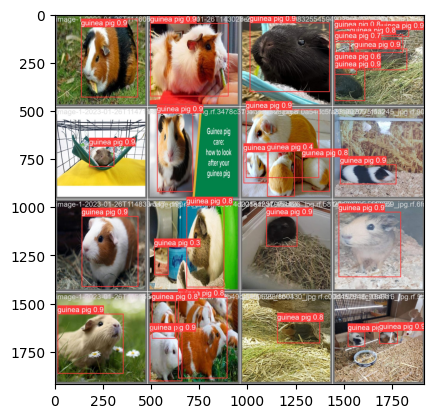

In [8]:
img = mpimg.imread('/kaggle/working/runs/detect/train/val_batch0_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

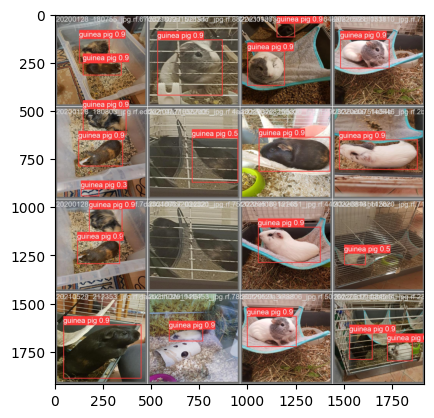

In [9]:
img = mpimg.imread('/kaggle/working/runs/detect/train/val_batch1_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

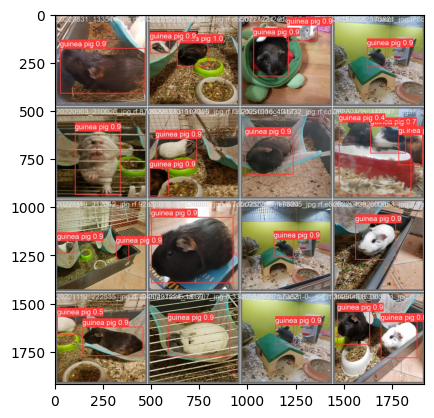

In [10]:
img = mpimg.imread('/kaggle/working/runs/detect/train/val_batch2_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

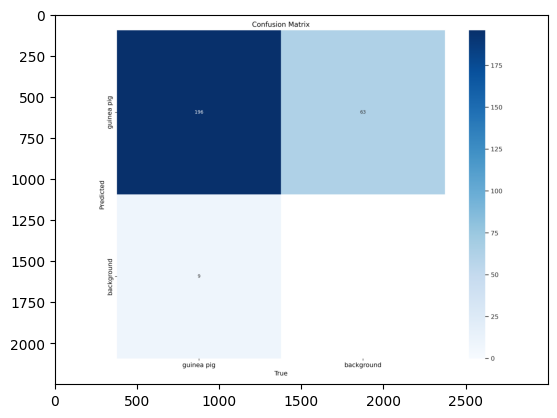

In [11]:
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')
imgplot = plt.imshow(img)
plt.show()

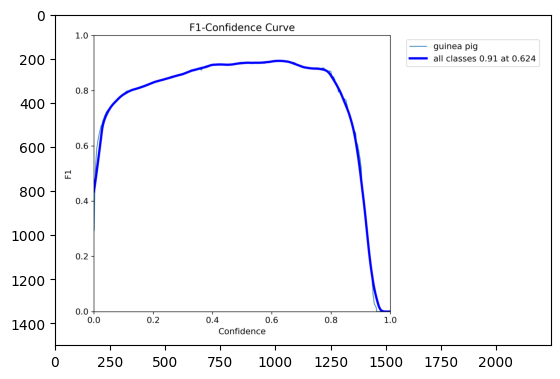

In [12]:
img = mpimg.imread('/kaggle/working/runs/detect/train/F1_curve.png')
imgplot = plt.imshow(img)
plt.show()